In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

In [2]:
# Chargez votre ensemble de données
dataset = pd.read_csv('Social_Network_Ads.csv')

# Conversion des catégories 'Male' et 'Female' en valeurs numériques
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Créez des catégories d'âge
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
dataset['Age_Category'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

In [3]:
# Matrice de caractéristiques et variable cible
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Division de l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Mise à l'échelle des caractéristiques
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Création du modèle SVM avec noyau RBF
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = classifier.predict(X_test)

# Classification Rapport
print("Classification Rapport :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :")
print(cm)

Classification Rapport :
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

Matrice de Confusion :
[[64  4]
 [ 3 29]]


<ipython-input-4-7b1c8e60dd16>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


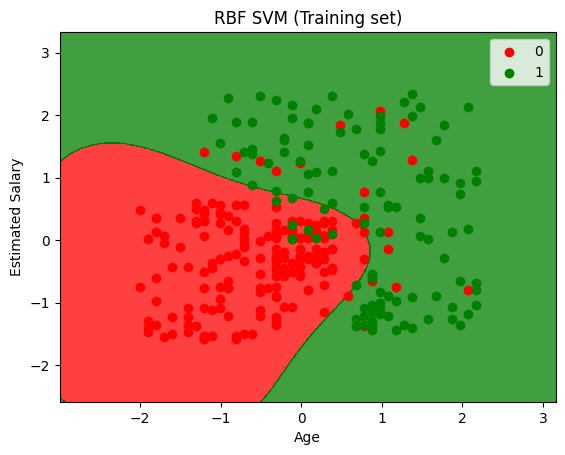

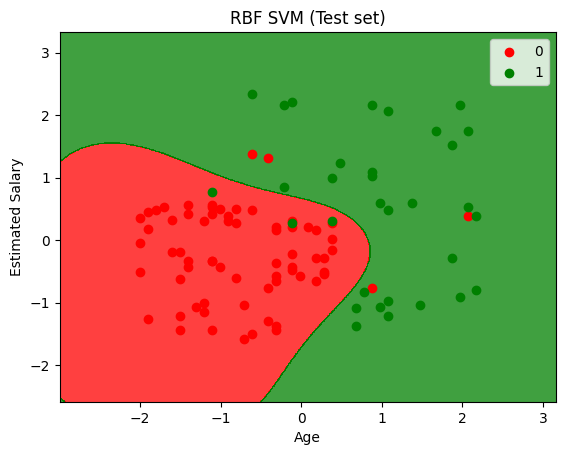

In [4]:
# Visualisation des résultats sur l'ensemble d'entraînement
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('RBF SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualisation des résultats sur l'ensemble de test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)

plt.title('RBF SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [7]:
# Amélioration des résultats
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma':[0.0001, 0.001, 0.01, 1, 10, 100,1000]}

svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm,
                           param_grid,
                           cv=3,
                           n_jobs=-1)
grid_search.fit(X_test, y_test)

grid_search.best_params_

{'C': 1, 'gamma': 1}

In [8]:
svm = SVC(kernel='rbf',C=100,gamma=0.01)

model_optimized = svm.fit(X_train, y_train)
y_pred_opt = model_optimized.predict(X_test)